<a href="https://colab.research.google.com/github/Gocoderunav/DSA-Project-IIT-Hyderabad/blob/main/dsa_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

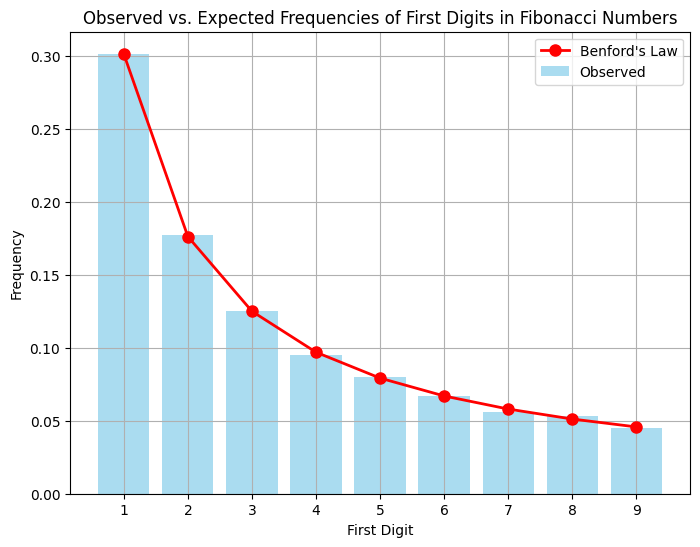

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def fibonacci(n):
    fib = [0, 1]
    while len(fib) < n:
        fib.append(fib[-1] + fib[-2])
    return fib

# Generate the first 1000 Fibonacci numbers
fibonacci_numbers = fibonacci(1000)

# Get the first digit of each Fibonacci number
first_digits = [int(str(num)[0]) for num in fibonacci_numbers if num != 0]

# Calculate observed frequencies
observed_freq = {digit: first_digits.count(digit) / len(first_digits) for digit in range(1, 10)}

# Calculate expected frequencies according to Benford's Law
benford = [np.log10(1 + 1 / d) for d in range(1, 10)]
benford_freq = {digit: benford[digit - 1] for digit in range(1, 10)}

# Plot observed vs. expected frequencies
plt.figure(figsize=(8, 6))
plt.bar(observed_freq.keys(), observed_freq.values(), color='skyblue', alpha=0.7, label='Observed')
plt.plot(benford_freq.keys(), benford_freq.values(), marker='o', color='red', linestyle='-', linewidth=2, markersize=8, label="Benford's Law")

plt.title('Observed vs. Expected Frequencies of First Digits in Fibonacci Numbers')
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.xticks(range(1, 10))
plt.grid(True)
plt.legend()
plt.show()



In [ ]:
from scipy.stats import chisquare, ks_2samp
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# Convert observed and expected frequencies to arrays
observed_freq_values = np.array(list(observed_freq.values()))
expected_freq_values = np.array(list(benford_freq.values()))

# Chi-Square Test
chi2_stat, chi2_p_value = chisquare(observed_freq_values, expected_freq_values)

# Kolmogorov-Smirnov Test
ks_stat, ks_p_value = ks_2samp(observed_freq_values, expected_freq_values)

# Mean Squared Error
mse = mean_squared_error(list(benford_freq.values()), list(observed_freq.values()))

# Mean Absolute Error
mae = mean_absolute_error(list(benford_freq.values()), list(observed_freq.values()))

# Pearson Correlation Coefficient
pearson_corr_coef, _ = pearsonr(list(benford_freq.values()), list(observed_freq.values()))

# Print the statistics
print("Chi-Square Test:")
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", chi2_p_value)
print("\nKolmogorov-Smirnov Test:")
print("KS Statistic:", ks_stat)
print("P-Value:", ks_p_value)
print("\nMean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Pearson Correlation Coefficient:", pearson_corr_coef)

print("Pearson Correlation Coefficient:", pearson_corr_coef)


Chi-Square Test:
Chi-Square Statistic: 0.00019795756218159437
P-Value: 1.0

Kolmogorov-Smirnov Test:
KS Statistic: 0.1111111111111111
P-Value: 1.0

Mean Squared Error: 1.4745700845928247e-06
Mean Absolute Error: 0.0009918343000493565
Pearson Correlation Coefficient: 0.9998824768387675
Pearson Correlation Coefficient: 0.9998824768387675


This experiment proved that numbers from a multi-congruential linear random number generator do not follow Benford's Law. Either Benford's Law does not truly define random data, or the generator itself somehow guarantees for each first digit to be distributed the same amount of times.

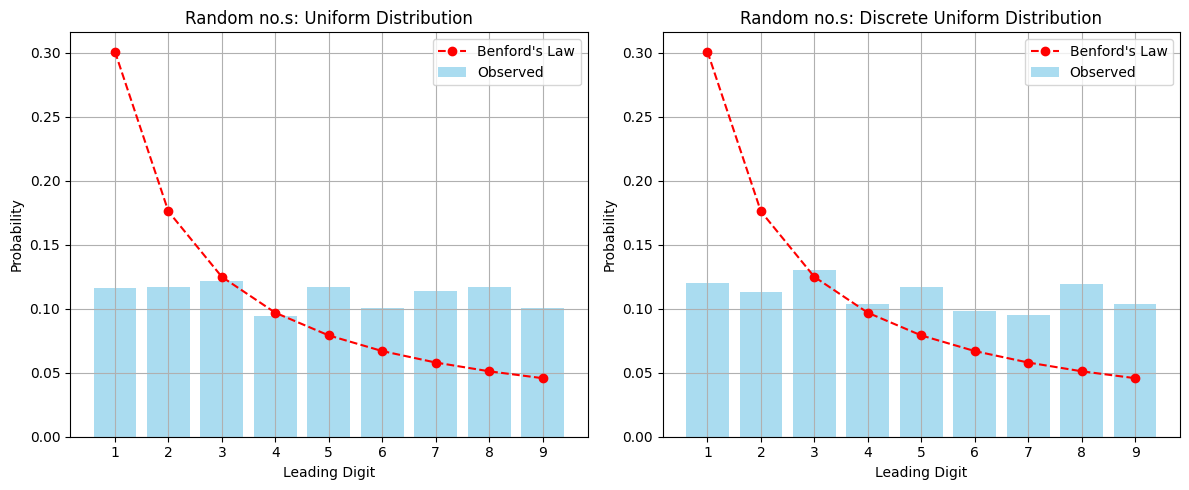

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def leading_digit(x):
    while x >= 10:
        x /= 10
    return int(x)

def benfords_law(digit):
    return np.log10(1 + 1 / digit)

# Generate random numbers for both methods
random_numbers_uniform = np.random.rand(1000)
random_numbers_discrete_uniform = np.random.randint(1, 101, size=1000)

# Extract leading digits for both methods
leading_digits_uniform = [leading_digit(x * 10) for x in random_numbers_uniform]
leading_digits_discrete_uniform = [leading_digit(x) for x in random_numbers_discrete_uniform]

# Calculate observed frequencies
observed_uniform = np.histogram(leading_digits_uniform, bins=range(1, 11), density=True)[0]
observed_discrete_uniform = np.histogram(leading_digits_discrete_uniform, bins=range(1, 11), density=True)[0]

# Calculate expected frequencies according to Benford's Law
benford_probabilities = np.array([benfords_law(digit) for digit in range(1, 10)])

# Plot histograms with Benford's Law overlay
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, 10), observed_uniform, color='skyblue', alpha=0.7, label='Observed')
plt.plot(range(1, 10), benford_probabilities, color='red', linestyle='--', marker='o', label="Benford's Law")
plt.title('Random no.s: Uniform Distribution')
plt.xlabel('Leading Digit')
plt.ylabel('Probability')
plt.xticks(range(1, 10))
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(range(1, 10), observed_discrete_uniform, color='skyblue', alpha=0.7, label='Observed')
plt.plot(range(1, 10), benford_probabilities, color='red', linestyle='--', marker='o', label="Benford's Law")
plt.title('Random no.s: Discrete Uniform Distribution')
plt.xlabel('Leading Digit')
plt.ylabel('Probability')
plt.xticks(range(1, 10))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


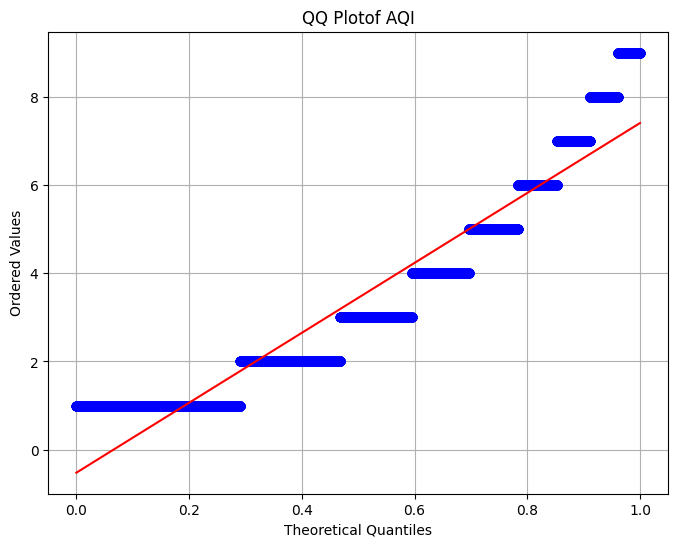

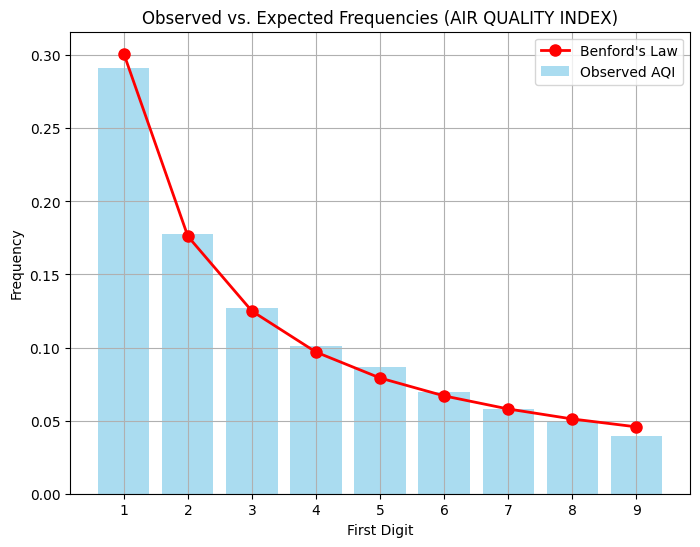

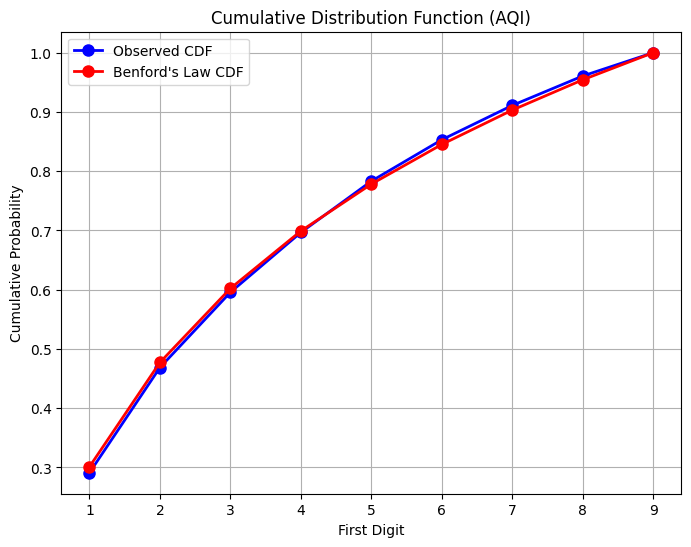

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Read the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\khush\Downloads\openaq.csv', delimiter=',')

# Extract the 'data left' column and remove empty spaces
data_left_cleaned = df['data left'].dropna()

# Convert data to numeric (assuming it's string data)
data_left_cleaned = pd.to_numeric(data_left_cleaned, errors='coerce').dropna()

# Remove leading digits of 0
data_left_no_zeros = data_left_cleaned[data_left_cleaned != 0]

# Get the first digit of each number
first_digits = data_left_no_zeros.astype(str).str[0].astype(int)

# Calculate observed frequencies
observed_freq = first_digits.value_counts(normalize=True).sort_index()

# Calculate expected frequencies according to Benford's Law (excluding 0)
benford = [np.log10(1 + 1 / d) for d in range(1, 10)]
benford_freq = np.array(benford)  # Include leading digit 1 through 9

# Generate QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(data_left_no_zeros, dist="uniform", plot=plt)
plt.title('QQ Plotof AQI')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

# Plot observed vs. expected frequencies
plt.figure(figsize=(8, 6))
plt.bar(observed_freq.index, observed_freq.values, color='skyblue', alpha=0.7, label='Observed AQI')
plt.plot(range(1, 10), benford_freq, marker='o', color='red', linestyle='-', linewidth=2, markersize=8, label="Benford's Law")
plt.title('Observed vs. Expected Frequencies (AIR QUALITY INDEX)')
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.xticks(range(1, 10))
plt.grid(True)
plt.legend()
plt.show()

# Generate CDF plot
plt.figure(figsize=(8, 6))
plt.plot(observed_freq.index, np.cumsum(observed_freq.values), marker='o', color='blue', linestyle='-', linewidth=2, markersize=8, label='Observed CDF')
plt.plot(range(1, 10), np.cumsum(benford_freq), marker='o', color='red', linestyle='-', linewidth=2, markersize=8, label="Benford's Law CDF")
plt.title('Cumulative Distribution Function (AQI)')
plt.xlabel('First Digit')
plt.ylabel('Cumulative Probability')
plt.xticks(range(1, 10))
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\khush\Downloads\openaq.csv', delimiter=',')

# Group values by country name
grouped_data = df.groupby('country')['Value'].apply(list).reset_index()

print(grouped_data)


                      country  \
0                 Afghanistan   
1                     Algeria   
2                     Andorra   
3         Antigua and Barbuda   
4                   Argentina   
..                        ...   
113            United Kingdom   
114             United States   
115                Uzbekistan   
116                  Viet Nam   
117  West Bank and Gaza Strip   

                                                 Value  
0                                              [136.0]  
1                                               [78.0]  
2    [7.9, 0.2, 108.7, 100.0, 50.5, 4.7, 11.0, 0.6,...  
3                                               [10.0]  
4    [6.0, 28.0, 0.0, 0.0, 17.51249989, 17.60416667...  
..                                                 ...  
113  [51.51488113, 25.0, 28.0, 22.0, 61.0, 20.0, 58...  
114  [23.0, 4.0, 0.0166, 0.02, 16.0, 5.0, 9.0, 0.00...  
115                                      [14.0, 0.011]  
116                              

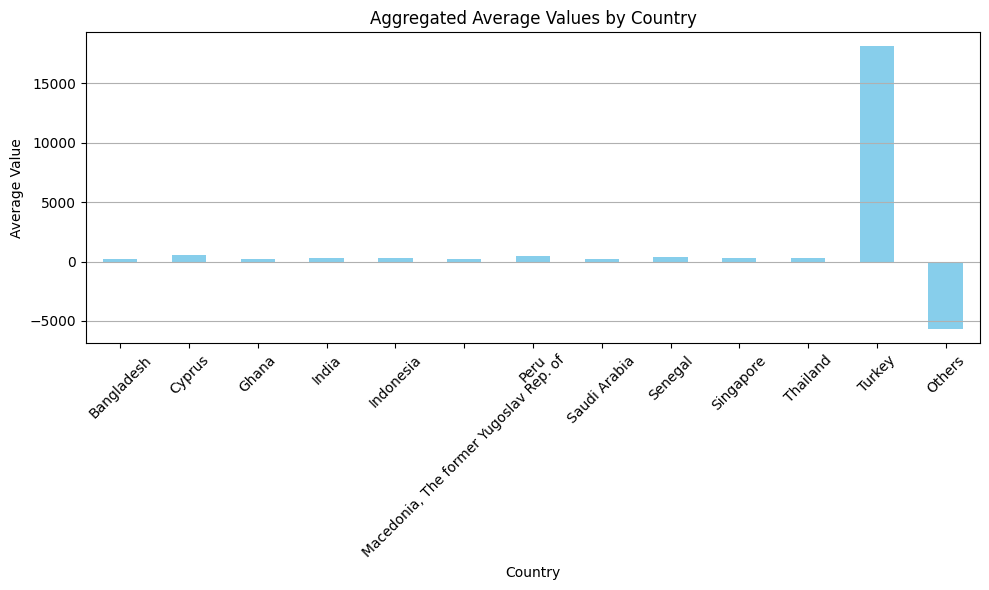

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\khush\Downloads\openaq.csv', delimiter=',')

# Calculate average value for each country
country_averages = df.groupby('country')['Value'].mean()

# Set the threshold to be 100 times smaller than the highest average value
threshold = country_averages.max() / 100

# Identify countries with average values below the threshold
less_significant_countries = country_averages[country_averages < threshold]

# Group less significant countries into an "Others" category
aggregated_data = country_averages[country_averages >= threshold]
aggregated_data['Others'] = less_significant_countries.sum()  # Sum values instead of taking mean

# Plotting
plt.figure(figsize=(10, 6))
aggregated_data.plot(kind='bar', color='skyblue')
plt.title('Aggregated Average Values by Country')
plt.xlabel('Country')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
!pip install --upgrade statsmodels




[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


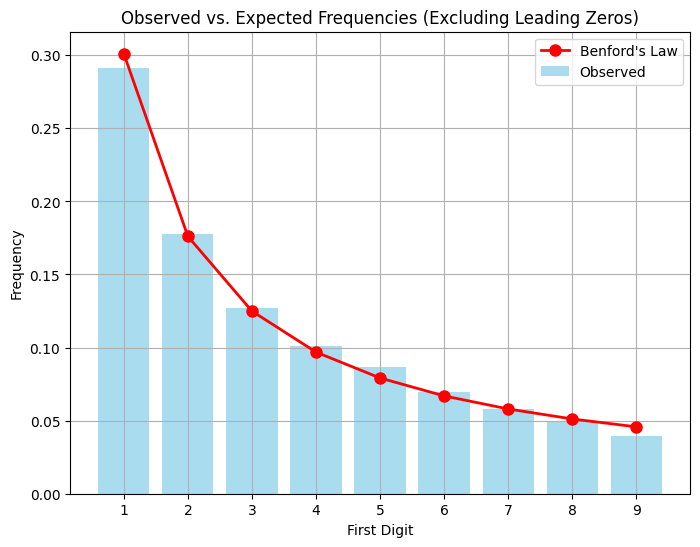

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare, ks_2samp
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# Read the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\khush\Downloads\openaq.csv', delimiter=',')

# Extract the 'data left' column and remove empty spaces
data_left_cleaned = df['data left'].dropna()

# Convert data to numeric (assuming it's string data)
data_left_cleaned = pd.to_numeric(data_left_cleaned, errors='coerce').dropna()

# Remove leading digits of 0
data_left_no_zeros = data_left_cleaned[data_left_cleaned != 0]

# Get the first digit of each number
first_digits = data_left_no_zeros.astype(str).str[0].astype(int)

# Calculate observed frequencies
observed_freq = first_digits.value_counts(normalize=True).sort_index()

# Calculate expected frequencies according to Benford's Law (excluding 0)
benford = [np.log10(1 + 1 / d) for d in range(1, 10)]
benford_freq = np.array(benford)  # Include leading digit 1 through 9

# Plot observed vs. expected frequencies
plt.figure(figsize=(8, 6))
plt.bar(observed_freq.index, observed_freq.values, color='skyblue', alpha=0.7, label='Observed')
plt.plot(range(1, 10), benford_freq, marker='o', color='red', linestyle='-', linewidth=2, markersize=8, label="Benford's Law")

plt.title('Observed vs. Expected Frequencies (Excluding Leading Zeros)')
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.xticks(range(1, 10))
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Calculate errors
chisq_stat, chisq_pvalue = chisquare(observed_freq, benford_freq)
ks_stat, ks_pvalue = ks_2samp(observed_freq, benford_freq)
mse = mean_squared_error(benford_freq, observed_freq.values)
mae = mean_absolute_error(benford_freq, observed_freq.values)
pearson_corr, _ = pearsonr(benford_freq, observed_freq.values)

# Print statistics
print("Chi-Square Test:")
print("Chi-Square Statistic:", chisq_stat)
print("P-Value:", chisq_pvalue)
print("\nKolmogorov-Smirnov Test:")
print("KS Statistic:", ks_stat)
print("P-Value:", ks_pvalue)
print("\nMean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Pearson Correlation Coefficient:", pearson_corr)


Chi-Square Test:
Chi-Square Statistic: 0.002325383176583159
P-Value: 0.999999999999924

Kolmogorov-Smirnov Test:
KS Statistic: 0.1111111111111111
P-Value: 1.0

Mean Squared Error: 2.5686852093711214e-05
Mean Absolute Error: 0.003993854040729639
Pearson Correlation Coefficient: 0.9982588430683559
